In [226]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

# Домашняя работа №5

**№1.** Известно, что генеральная совокупность распределена нормально с известным средним квадратическим отклонением 16. Найти доверительный интервал для оценки математического ожидания mu с надёжностью 0.95, если выборочное среднее равно 80, а объём равен 256.

**1 способ (ручной)**. По условию задачи: $X\sim N(\mu, 16)$, $\gamma = 0.95$, $\overline{x_B} = 80$, $n = 256$. Найдем доверительный интервал.

1) Так как $2\cdot \Phi(t_{\gamma}) = \gamma$, то $\Phi(t_{\gamma}) = \frac{\gamma}{2} = \frac{0.95}{2} = 0.475$. Отсюда по таблице значений функции Лапласа $t_{\gamma} = 1.96$ -- коэффициент доверия.

2) Так как $\delta = \frac{t_{\gamma}\cdot \sigma}{\sqrt{n}}$, то $\delta = \frac{1.96\cdot 16}{\sqrt{256}} = 1.96$ -- точность.

3) Доверительный интервал: $(\overline{x_B} - \delta; \overline{x_B} + \delta) = (80 - 1.96; 80 + 1.96) = (78.04; 81.96)$.

**2 способ (с помощью Python)**. Дано:

In [227]:
n = 256 # объем выборки
mean = 80 # выборочное среднее
std = 16 # среднее квадратическое отклонение

In [228]:
gamma = 0.95 # надежность (уровень доверия)
alpha = 1 - gamma

#коэффициент доверия
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

t1, t2

(-1.959963984540054, 1.959963984540054)

Доверительный интервал:

In [229]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(78.04003601545995, 81.95996398454005)

**№2.** Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:

202, 203, 199, 197, 195, 201, 200, 204, 194, 190

Известно, что их веса распределены нормально.
1. Верно ли утверждение продавца, если учитывать, что уровень значимости равен 1%?
2. Найдите P-значение для данного теста.

**1 способ (ручной)**. По условию задачи: $X\sim N(\mu, \sigma)$, $\alpha = 0.01$, $n = 10$.
    
Нулевая гипотеза: $H_0: \mu = \mu_0 = 200$.

Альтернативная гипотеза: $H_1: \mu < \mu_0$.

Используемый критерий: $T = \frac{(\overline{x} - \mu)\sqrt{n}}{s}$ имеет распределение Стьюдента со степенями свободы $k = n-1 = 10-1 = 9$.

1) Найдем выборочное среднее и исправленное среднее квадратическое отклонение:

$\overline{x} = \frac{1}{n}\Sigma_{i=1}^{n}x_i = 198.5$,

$D_x = \frac{1}{n-1}\Sigma_{i=1}^{n}(x_i-\overline{x})^2 = 19.833$,

$s = \sqrt{D_x} = 4.45$.

2) Определяем критическую область:

По таблице критических точек распределения Стьюдента (односторонняя критическая область)

$t_{krit} = t(k, \alpha) = t(9, 0.01) = 2.82$.

В силу выбора альтернативной гипотезы (рассматриваем меньшие значения), имеем следующую критическую область: $(-\infty; -2.82)$.

3) Вычисляем наблюдаемое значение:

$t_{nabl} = \frac{(\overline{x} - \mu_0)\sqrt{n}}{s} = \frac{(198.5 - 200)\sqrt{10}}{4.45} = -1.067$.

Так как $t_{nabl}$ не попало в критическую область, то на уровне значимости $\alpha$ нулевую гипотезу принимаем.

**Вывод:** Средний вес пачки печенья статистически значимо не отличим от 200.

**2 способ (с помощью Python)**. Дано:

Нулевая гипотеза: $H_0: \mu = \mu_0 = 200$.

Альтернативная гипотеза: $H_1: \mu < \mu_0$.

In [230]:
mu0 = 200

alpha = 0.01

data = [202, 203, 199, 197, 195, 201, 200, 204, 194, 190]

df = pd.DataFrame(data, columns=['x_i'])

df

,x_i
0,202
1,203
2,199
3,197
4,195
5,201
6,200
7,204
8,194
9,190


Определяем критическую область:

In [231]:
n = df['x_i'].shape[0]

tl = stats.t.ppf(alpha, df=n - 1)
tl

-2.8214379233005498

Критическая область: $(-\infty; -2.8214379233005498)$

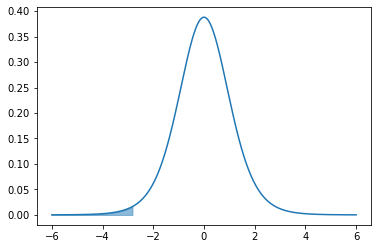

In [232]:
ox = np.linspace(-6, 6, 500)
oy = stats.t.pdf(ox, df=n - 1)

ox_left = np.linspace(-6, tl, 100)
oy_left = stats.t.pdf(ox_left, df=n - 1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')

Вычисляем наблюдаемое значение:

In [233]:
def statistic(samples):
    return (samples.mean() - mu0) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [234]:
t = statistic(df['x_i'])
t

-1.0651074037450896

Наблюдаемое значение не попало в критическую область. Значит, на уровне значимости $\alpha$ нулевую гипотезу принимаем.

Вычислим P-value -- наибольшее значение уровня значимости $\alpha$, при котором гипотезу можно принять (т.е. при котором значение статистики, посчитанной по выборке, ещё не попадает в критическую область).

In [235]:
n = df['x_i'].shape[0]
S = statistic(df['x_i'])

p_left = stats.t.cdf(S, df=n - 1)

pvalue = p_left

print(f'p-value = {pvalue}')

p-value = 0.15728330176236427


Так как $\alpha = 0.01 < p-value = 0.16$, то в критическую область не попали, нет оснований отвергать гипотезу $H_0$.

**Вывод:** На уровне значимости $\alpha$ гипотезу $H_0$ принимаем, т.е. средний вес пачки печенья статистически значимо не отличим от 200г.

**№3.** Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя уровень значимости 0.025 и правостороннюю критическую область, проверить данную гипотезу при условии, что в выборке из 100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 мм.

**1 способ (ручной).** По условию:
$\alpha =0.025$, $n = 100$, $\overline{x_B} = 17.5$, $\sigma^2 = 4$. 

Нулевая гипотеза $H_0: \mu = \mu_o = 17$.

Альтернативная гипотеза: $H_1: \mu > \mu_0$.

Используемый критерий: $Z = \frac{(\overline{x} - \mu)\sqrt{n}}{\sigma}$ имеет нормальное распределение.

1) Определяем критическую область:

Так как $\Phi(z_{krit}) = \frac{1-2\alpha}{2} = 0.475$, то по таблице значений функции Лапласа $z_{krit} = 1.96$.

Критическая область: $(1.96; +\infty)$.

2) Вычисляем наблюдаемое значение:

$z_{nabl} = \frac{(\overline{x} - \mu_0)\sqrt{n}}{\sigma} = \frac{(17.5 - 17)\sqrt{100}}{\sqrt{4}} = 2.5$.

Так как $z_{nabl}$ попало в критическую область, то на уровне значимости $\alpha$ нулевую гипотезу отвергаем.

**Вывод:** На уровне значимости $\alpha$ нулевую гипотезу отвергаем, т.е. средний диаметр шариков статистически значимо отличается от 17 (полученное на выборке значение не случайно).

**2 способ (с помощью Python)**. Дано:

Нулевая гипотеза: $H_0: \mu = \mu_0 = 17$.

Альтернативная гипотеза: $H_1: \mu > \mu_0$.

In [236]:
alpha = 0.025 
mean = 17.5
n = 100
sigma = 2

Определяем критическую область:

In [237]:
tr = stats.norm.ppf(1 - alpha)
tr

1.959963984540054

Критическая область: $(1.959963984540054; +\infty)$.

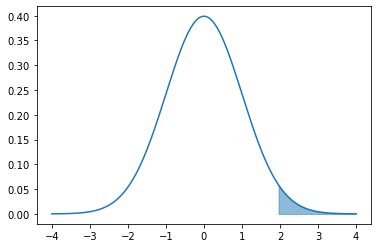

In [238]:
ox = np.linspace(-4, 4, 500)
oy = stats.norm.pdf(ox)

ox_right = np.linspace(tr, 4, 100)
oy_right = stats.norm.pdf(ox_right)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Определяем наблюдаемое значение:

In [239]:
z = (mean - 17)*np.sqrt(n) / sigma
z

2.5

Так как наблюдаемое значение попало в критическую область, то на уровне значимости $\alpha$ нулевую гипотезу отвергаем.

**Вывод:** На уровне значимости $\alpha$ нулевую гипотезу отвергаем, т.е. средний диаметр шариков статистически значимо отличается от 17 (отклонения в результате не случайны).

**№4.(Дополнительно)** Дана выборка диаметров подшипников из примера 1 с занятия 5:

samples = [0.6603, 0.9466, 0.5968, 1.3792, 1.5481, 0.7515, 1.0681, 1.1134,
1.2088, 1.701 , 1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372,
0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02 ]

Предполагая, что диаметры подшипников распределены нормально, проверьте гипотезу о том, что дисперсия случайной величины равна 0.0625 при уровне значимости alpha = 0.05. Что для этого нужно знать:
1. Альтернативная гипотеза двухсторонняя.
2. Статистика для теста: H = (n - 1) * sample_variance / variance, где n - число элементов в выборке, sample_variance - несмещённая оценка дисперсии, variance - утверждаемая нулевой гипотезой дисперсия.
3. Эта статистика в предположении верности нулевой гипотезы имеет распределение хи-квадрат с параметром df = n - 1. Её квантили можно найти с помощью функции scipy.stats.chi2.ppf.

**1 способ (ручной)**. 

Нулевая гипотеза: $H_0: \sigma^2 = \sigma_{0}^2 = 0.0625$.

Альтернативная гипотеза: $H_1: \sigma^2 \ne \sigma_{0}^2$.

Уровень значимости: $\alpha = 0.05$

Критерий: $\chi^2 = \frac{(n-1)s^2}{\sigma_{0}^2}$ имеет распределение $\chi^2$ c $k = n-1 = 14 - 1 = 13$ степенями свободы.

1) Посчитаем исправленную дисперсию (несмещенную выборочную дисперсию):

$\overline{x} = \frac{1}{n}\Sigma_{i = 1}^{n} x_i = 1.12$.

$s^2 = \frac{1}{n-1}\Sigma_{i = 1}^{n}(x_i - \overline{x})^2 = 0.04$.

2) Определяем критическую область:

По таблице критических точек распределения $\chi^2$ имеем:

$\chi^{2}_{krl} = \chi^2(1-\alpha/2, k) = \chi^2(1-0.05/2, 13) = 5.01$

$\chi^{2}_{krr} = \chi^2(\alpha/2, k) = \chi^2(0.05/2, 13) = 24.7$.

Критическая область: $(0; 5.01) \cup (24.7; +\infty)$.

3) Вычисляем наблюдаемое значение:

$h =\frac{(n - 1)s^2}{\sigma_{0}^2} = \frac{(14 - 1)0.04}{0.0625} = 8.32$.

**Вывод:** Так как наблюдаемое значение не попало в критическую область, то на уровне значимости $\alpha$ нулевую гипотезу принимаем, т.е. дисперсия статистически незначимо отличается от 0.0625.

**2 способ (с помощью Python)**. Дано:

Нулевая гипотеза: $H_0: \sigma^2 = \sigma_{0}^2 = 0.0625$.

Альтернативная гипотеза: $H_1: \sigma^2 \ne \sigma_{0}^2$.

Уровень значимости: $\alpha = 0.05$

Критерий: $\chi^2 = \frac{(n-1)s^2}{\sigma_{0}^2}$ имеет распределение $\chi^2$ c $k = n-1 = 14 - 1 = 13$ степенями свободы.


In [240]:
data = [1.0282, 1.3579, 1.0191, 1.1784, 1.1168, 1.1372, 0.7273, 1.3958, 0.8665, 1.5112, 1.161 , 1.0232, 1.0865, 1.02]
df = pd.DataFrame(data, columns=['x_i'])
print('Данная выборка')
df

Данная выборка


,x_i
0,1.0282
1,1.3579
2,1.0191
3,1.1784
4,1.1168
5,1.1372
6,0.7273
7,1.3958
8,0.8665
9,1.5112


Определим критическую область:

In [243]:
alpha = 0.05
n = df['x_i'].shape[0]

t1 = stats.chi2.ppf(alpha / 2, df=n - 1)
t2 = stats.chi2.ppf(1 - alpha / 2, df=n - 1)

t1, t2

(5.00875051181033, 24.735604884931547)

Критическая область: $(0; 5.008750511810331) \cup (24.735604884931547; +\infty)$.

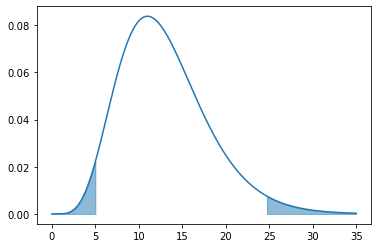

In [244]:
ox = np.linspace(0, 35, 500)
oy = stats.chi2.pdf(ox, df = n-1)

ox_left = np.linspace(0, t1, 100)
oy_left = stats.chi2.pdf(ox_left, df = n-1)

ox_right = np.linspace(t2, 35, 100)
oy_right = stats.chi2.pdf(ox_right, df = n-1)

plt.plot(ox, oy)
plt.fill_between(ox_left, oy_left, alpha=0.5, color='C0')
plt.fill_between(ox_right, oy_right, alpha=0.5, color='C0')

Определяем наблюдаемое значение:

In [245]:
sigma0 = 0.0625

h = (n - 1)*df['x_i'].var(ddof=1) / sigma0
h

8.775810434285717

**Вывод:** Так как наблюдаемое значение не попало в критическую область, то на уровне значимости $\alpha$ нулевую гипотезу принимаем, т.е. дисперсия статистически незначимо отличается от 0.0625.